
# The Best Model As Of July 23 2020

10 jets, #nofilter, PtEtaPhi network, restricted dataset

Create and train network

In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout
sys.path.append(os.path.realpath("../../"))
import ptetaphi_nn
import tools

# get data file path
with open("/home/cmccracken/start_tf/bbb/filepath.txt", 'r') as f:
    filename = f.read()
    
s_table = tools.open_file(filename, sort_by="tag", pt_cut=40, eta_cut=2.5)

# filter for events with 3 b tags
nt3 = s_table.nbtags==3 
events = s_table[nt3]
print(len(events))

cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)

# make and train network
nn = ptetaphi_nn.PtEtaPhiNN(events, chop=0, print_summary=True)
nn.learn(epochs=800)

Using TensorFlow backend.


sorting data by tag
287645
creating default model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_________________________________________________________________
drop

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



201351/201351 [==============================] - 10s 52us/step - loss: 0.1527 - acc: 0.9406 - val_loss: 0.3484 - val_acc: 0.9143
Epoch 736/800
201351/201351 [==============================] - 10s 52us/step - loss: 0.1526 - acc: 0.9403 - val_loss: 0.3482 - val_acc: 0.9136
Epoch 737/800
201351/201351 [==============================] - 10s 52us/step - loss: 0.1533 - acc: 0.9404 - val_loss: 0.3469 - val_acc: 0.9134
Epoch 738/800
201351/201351 [==============================] - 10s 52us/step - loss: 0.1521 - acc: 0.9413 - val_loss: 0.3491 - val_acc: 0.9139
Epoch 739/800
201351/201351 [==============================] - 10s 52us/step - loss: 0.1521 - acc: 0.9409 - val_loss: 0.3469 - val_acc: 0.9150
Epoch 740/800
201351/201351 [==============================] - 10s 52us/step - loss: 0.1523 - acc: 0.9406 - val_loss: 0.3477 - val_acc: 0.9141
Epoch 741/800
201351/201351 [==============================] - 10s 52us/step - loss: 0.1521 - acc: 0.9405 - val_loss: 0.3486 - val_acc: 0.9147
Epoch 742/800

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Evaluate network

100%|██████████| 57529/57529 [00:00<00:00, 113509.15it/s]


overall accuracy: 91.53 percent
ignoring 1.40 percent (808 events) of 57529 events


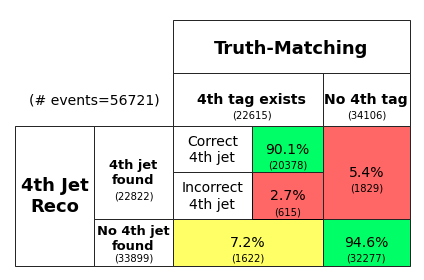

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2]:
nn.evaluate(savename="with_cuts")

Save model for use later

In [3]:
# save the architecture string to a file
models_dir = "/home/cmccracken/start_tf/bbb/models/"
with open(models_dir+'architecture_23_07_2020.json', 'w') as arch_file:
    arch_file.write(nn.model.to_json())
# now save the weights as an HDF5 file
nn.model.save_weights(models_dir+'weights_23_07_2020.h5')
# use nn_tester to get csv!